In [5]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")

C:\Users\prana\AppData\Local\Temp\ipykernel_15228\942108576.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")


In [7]:
dffir['year_month'] = pd.to_datetime(dffir['Year'].astype(str) + '-' + dffir['Month'].astype(str), format='%Y-%m')
dffir.head()

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No,year_month
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00.000,2015-12-27 12:05:00.000,2016-01-05 11:00:00.000,05/01/2016,...,1,1,0,1,1,0,2016000002,1245,10470124520160001,2016-01-01
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00.000,2016-01-12 17:35:00.000,2016-01-12 19:00:00.000,12/01/2016,...,5,5,0,5,5,2,2016000003,1245,10470124520160002,2016-01-01
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00.000,2016-01-12 17:50:00.000,2016-01-12 19:30:00.000,12/01/2016,...,1,1,0,1,1,0,2016000004,1245,10470124520160003,2016-01-01
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00.000,2016-01-14 21:35:00.000,2016-01-15 14:00:00.000,15/01/2016,...,1,1,0,1,1,0,2016000005,1245,10470124520160004,2016-01-01
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00.000,2016-01-18 15:05:00.000,2016-01-18 19:30:00.000,18/01/2016,...,1,1,0,1,1,0,2016000006,1245,10470124520160005,2016-01-01


In [8]:
count = dffir.groupby('year_month').size().to_frame(name='count')
count = count.sort_values(by='year_month')
# Print result (or alternatively you can return the 'pocso_count' dataframe)

count.to_csv('karnataka_total_count.csv', index=True)
count.drop(count.tail(1).index, inplace=True)
print(count)

            count
year_month       
2016-01-01  21310
2016-02-01  21124
2016-03-01  19629
2016-04-01  17458
2016-05-01  18514
...           ...
2023-10-01  19397
2023-11-01  18906
2023-12-01  19385
2024-01-01  18045
2024-02-01  18831

[98 rows x 1 columns]


In [9]:
dfkarnataka = pd.read_csv("karnataka_total_count.csv",index_col='year_month',parse_dates=True)
dfkarnataka.index.freq='MS'
dfkarnataka.head()

,count
year_month,
2016-01-01,21310
2016-02-01,21124
2016-03-01,19629
2016-04-01,17458
2016-05-01,18514


<Axes: xlabel='year_month'>

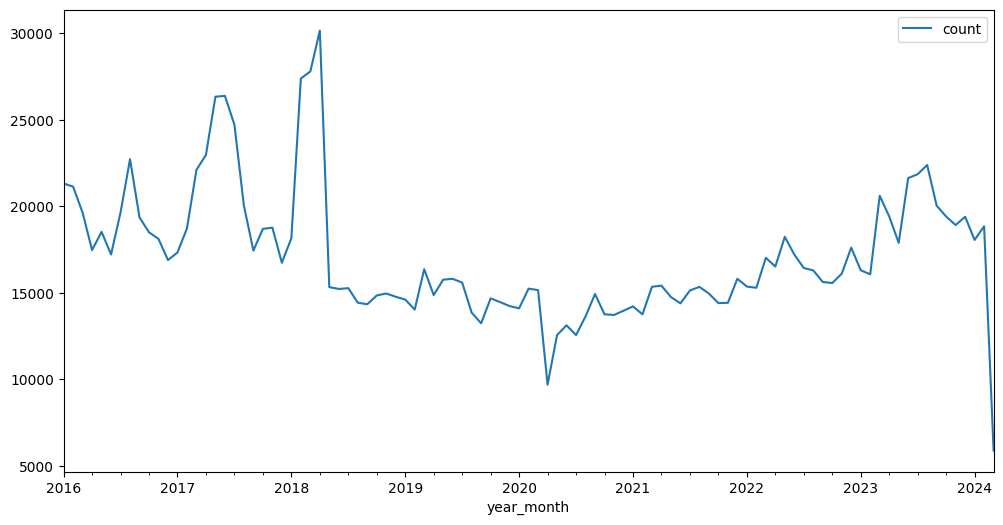

In [10]:
dfkarnataka.plot(figsize=(12,6))

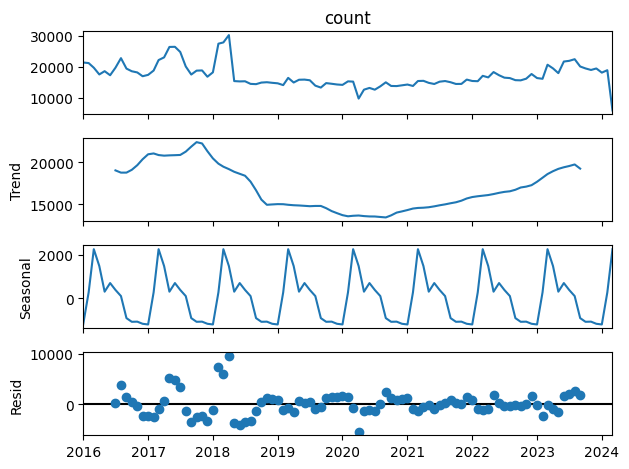

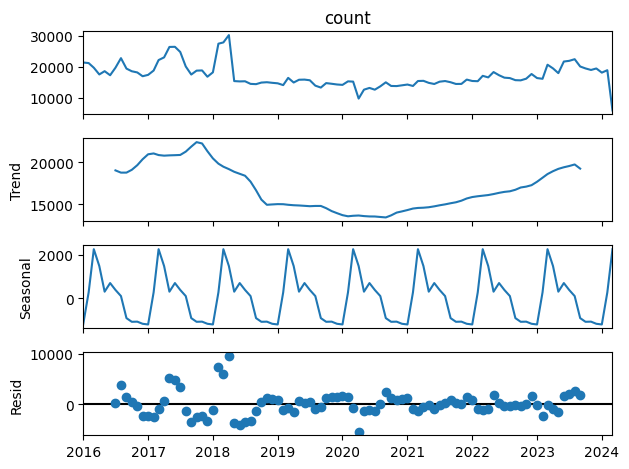

In [11]:
results = seasonal_decompose(dfkarnataka['count'])
results.plot()

In [12]:
train = dfkarnataka.iloc[:80]
test = dfkarnataka.iloc[80:]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train

array([[0.5682673 ],
       [0.55918128],
       [0.48615114],
       [0.38009868],
       [0.43168385],
       [0.36773973],
       [0.48615114],
       [0.63675443],
       [0.47232671],
       [0.43036491],
       [0.41170436],
       [0.35191246],
       [0.37340628],
       [0.44140491],
       [0.60666308],
       [0.64906453],
       [0.81329686],
       [0.81554394],
       [0.73406282],
       [0.50564213],
       [0.37868204],
       [0.44008598],
       [0.4434566 ],
       [0.34434077],
       [0.4136095 ],
       [0.86458893],
       [0.88456841],
       [1.        ],
       [0.2755117 ],
       [0.27038249],
       [0.27258072],
       [0.23159592],
       [0.2271506 ],
       [0.25201505],
       [0.2575839 ],
       [0.24830248],
       [0.24038884],
       [0.21215378],
       [0.32616873],
       [0.25304089],
       [0.29656587],
       [0.2989595 ],
       [0.28831029],
       [0.2035074 ],
       [0.17341605],
       [0.24380831],
       [0.23320795],
       [0.221

In [16]:
from keras import preprocessing

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
# We do the same thing, but now instead for 12 months
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

d:\KRK Datathon\datathon\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
43/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0807

d:\KRK Datathon\datathon\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0679
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0302
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0374
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0282
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0308 
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0234
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0350
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245
Epoch 16/50
68/68 ━━━━━━━━━━

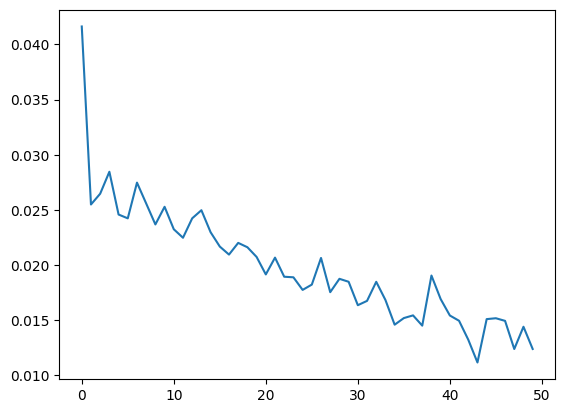

In [22]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [23]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


C:\Users\prana\AppData\Local\Temp\ipykernel_15228\606562851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='year_month'>

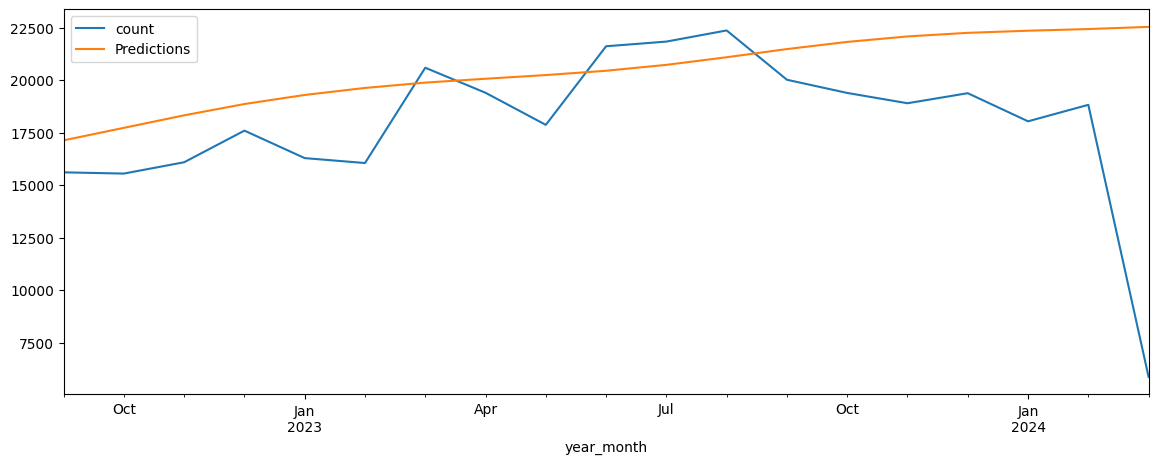

In [24]:
true_predictions = scaler.inverse_transform(test_predictions)
     

test['Predictions'] = true_predictions
     

test.plot(figsize=(14,5))

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['count'],test['Predictions']))
print(rmse)

4487.123416804357


In [27]:
model.save("karnatakatotal.keras")